

# Project: Investigate a Dataset (noshow_appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction


#### No show appointments
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

> ● ‘ScheduledDay’ tells us on what day the patient set up their
appointment.
● ‘Neighborhood’ indicates the location of the hospital.
● ‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
● Be careful about the encoding of the last column: it says 
‘No’ if the patient showed up to their appointment, and 
‘Yes’ if they did not show up.

What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?


In [2]:
# import statements for all of the packages 
import pandas as pd
import numpy as np
import seaborn as ans
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# load dataset
df_appoint = pd.read_csv('noshow_appointments.csv')


In [4]:
#view dataset
# although, you can specify however many you'd like returned
df_appoint.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [5]:
#this returns a tuple of the dimensions of the dataframe
df_appoint.shape

(110527, 14)

In [6]:
#this display a concise summary of the dataframe,
# inclouding the number of non-null values in each column
df_appoint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [7]:
#check if there is missing values
df_appoint.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

#### we don't have missing values

In [8]:
#check for duplictes row in the data
sum(df_appoint.duplicated())

0

#### we don't have duplictes row 

In [9]:
#this returns the number of unique values in each column 
df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


There is mines vlaue in age columns.It doesn't make sense.

In [10]:
#this returns the datatypes of the columns
df_appoint.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

#### we have two columns( ScheduledDay and AppointmentDay),
#### it's need to change the data types form object to datetime.


### Data Cleaning 

#### Rename Columns

In [12]:
# Rename No-show Column and correction spelling mistakes for some Columns
df_appoint.rename(columns={'No-show':'No_show', 'Hipertension':'Hypertension', 'Handcap':'Handicap'}, inplace=True )

# confirm changes 
df_appoint.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


#### Fix ScheduledDay , AppointmentDay datatypes

In [13]:
#Use the to_datetime function
#I change ScheduledDay cloumns from object to datetime
df_appoint['ScheduledDay'] =  pd.to_datetime(df_appoint['ScheduledDay'])

In [14]:
#Use the to_datetime function
#I change ScheduledDay cloumns from object to datetime
df_appoint['AppointmentDay'] =  pd.to_datetime(df_appoint['AppointmentDay'])

In [15]:
#confirm changes
df_appoint.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                   object
dtype: object

#### Fix Age cloumn

In [16]:
df_appoint[df_appoint['Age'] < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


In [17]:
# drop row 
df_appoint.drop(df_appoint.index[99832], inplace=True)

In [18]:
#confirm changes
df_appoint.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [19]:
df_appoint.shape

(110526, 14)

#### Convert data in No_show column from yes &No to 1,0 to easy handling with it

In [20]:
# ‘No’ if the patient showed up to their appointment, and 
# ‘Yes’ if they did not show up.
# ‘No’ = 0 and ‘Yes’ = 1
df_appoint.No_show[df_appoint['No_show'] == 'Yes'] = '1'
df_appoint.No_show[df_appoint['No_show'] == 'No'] = '0'

C:\Users\khloud\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\khloud\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [21]:
#convert datatype from object to numrical
df_appoint['No_show'] = df_appoint['No_show'].astype(int)

In [22]:
df_appoint.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what is the distribution of the Age for the patient show-up and no-show the appointment?)

In [23]:
#create mask
showup = df_appoint.No_show == False
noshow = df_appoint.No_show == True


In [24]:
df_appoint.Age[showup].mean()

37.790504154999034

In [25]:
df_appoint.Age[noshow].mean()

34.31766656212196

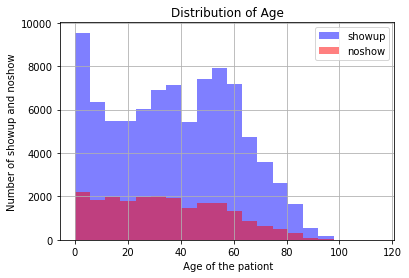

In [26]:
#plot Distribution
df_appoint.Age[showup].hist(alpha=0.5, bins=20, label='showup', color='blue')
df_appoint.Age[noshow].hist(alpha=0.5, bins=20, label='noshow', color='red')
plt.title("Distribution of Age")
plt.xlabel(" Age of the pationt")
plt.ylabel("Number of showup and noshow")
plt.legend();

> #### So, based on this plot, it does look like the really young children have a higher attend appointments then the Age from (45-65).

> #### the Age form (23 to 40) and (0-5) have a higher number didn't attend appointments.

### Research Question 2  (How many patients attended and did not attended the appointment with the Gender?)

In [46]:
#avreage of the Gender 
X = df_appoint.groupby('Gender').No_show.mean()
X

Gender
F    0.203149
M    0.199679
Name: No_show, dtype: float64

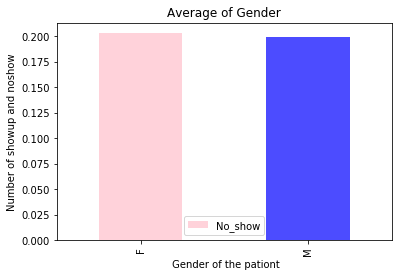

In [80]:
#avreage of the Gender 
X.plot(kind='bar',alpha=0.7 , color= ['pink','blue'])
plt.title("Average of Gender")
plt.xlabel(" Gender of the pationt")
plt.ylabel("Number of showup and noshow")
plt.legend();

> #### females is greater than of males.

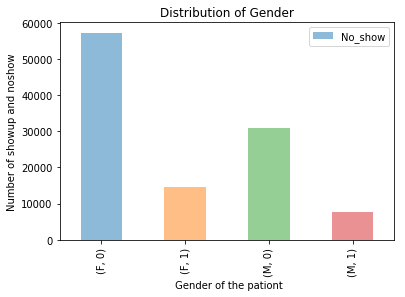

In [160]:

df_appoint.groupby('Gender').No_show.value_counts().plot(kind='bar',alpha=0.5 )
plt.title("Distribution of Gender")
plt.xlabel(" Gender of the pationt")
plt.ylabel("Number of showup and noshow")
plt.legend();

> #### (F,0) means female show up ,(F,1) means female no show
>#### (M,0) means male show up,(M,1) means male no show

#### The number of female who attended the appointment greater than male.
#### The number of female who didn't attend the appointment greater than male. 

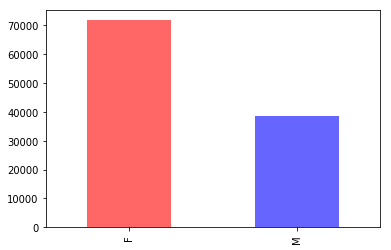

In [56]:
#The number of female and male
df_appoint.Gender.value_counts().plot(kind='bar',alpha=0.6, color=['red','blue']);

> #### The number of females is greater than of males

### Research Question 3 (compare between the patient who show and didn't show the appointment and whether or not the patient is enrolled in Brasilian welfare program ? )

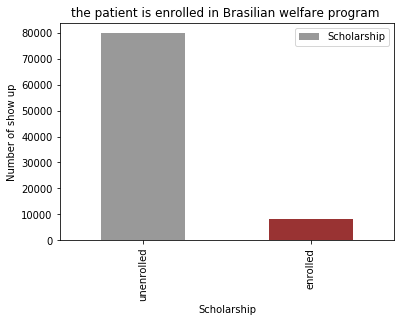

In [61]:
#the patient show up the appointment 
df_appoint.Scholarship[showup].value_counts().plot(kind='bar', alpha=0.8, color=['gray','maroon'])
plt.title("the patient is enrolled in Brasilian welfare program ")
plt.xlabel("Scholarship")
plt.ylabel("Number of show up")
plt.xticks([0, 1],['unenrolled','enrolled'])
plt.legend();

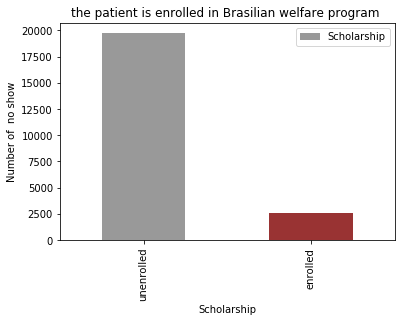

In [60]:
#the patient didn't show the appointment 
df_appoint.Scholarship[noshow].value_counts().plot(kind='bar',alpha=0.8, color=['gray','maroon'])
plt.title("the patient is enrolled in Brasilian welfare program ")
plt.xlabel("Scholarship")
plt.ylabel("Number of  no show")
plt.xticks([0, 1],['unenrolled','enrolled'])
plt.legend();

> #### The most of the patient unenrolled in Brasilian welfare program are  attended the appointment.

### Research Question 4 (How many patients attended and did not attended the appointment by received SMS?)

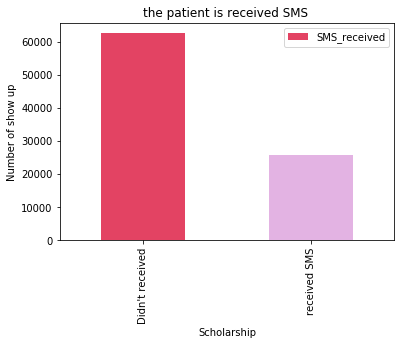

In [173]:
#patients attended the appointment by received SMS 
df_appoint.SMS_received[showup].value_counts().plot(kind='bar', alpha=0.8, color=['crimson','plum'])
plt.title("the patient is received SMS ")
plt.xlabel("Scholarship")
plt.ylabel("Number of show up")
plt.xticks([0, 1],["Didn't received","received SMS"])
plt.legend();

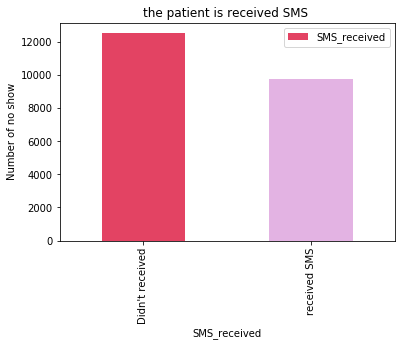

In [174]:
#patients did not attend the appointment by received SMS 
df_appoint.SMS_received[noshow].value_counts().plot(kind='bar', alpha=0.8, color=['crimson','plum'])
plt.title("the patient is received SMS ")
plt.xlabel("SMS_received")
plt.ylabel("Number of no show")
plt.xticks([0, 1],["Didn't received","received SMS"])
plt.legend();

> #### SMS text message reminders are may not be effective in reducing the nonattendance rate 

### Research Question 5 (What are hospitals that have the highest number for patients who attended and didn't attend the appointment ?)

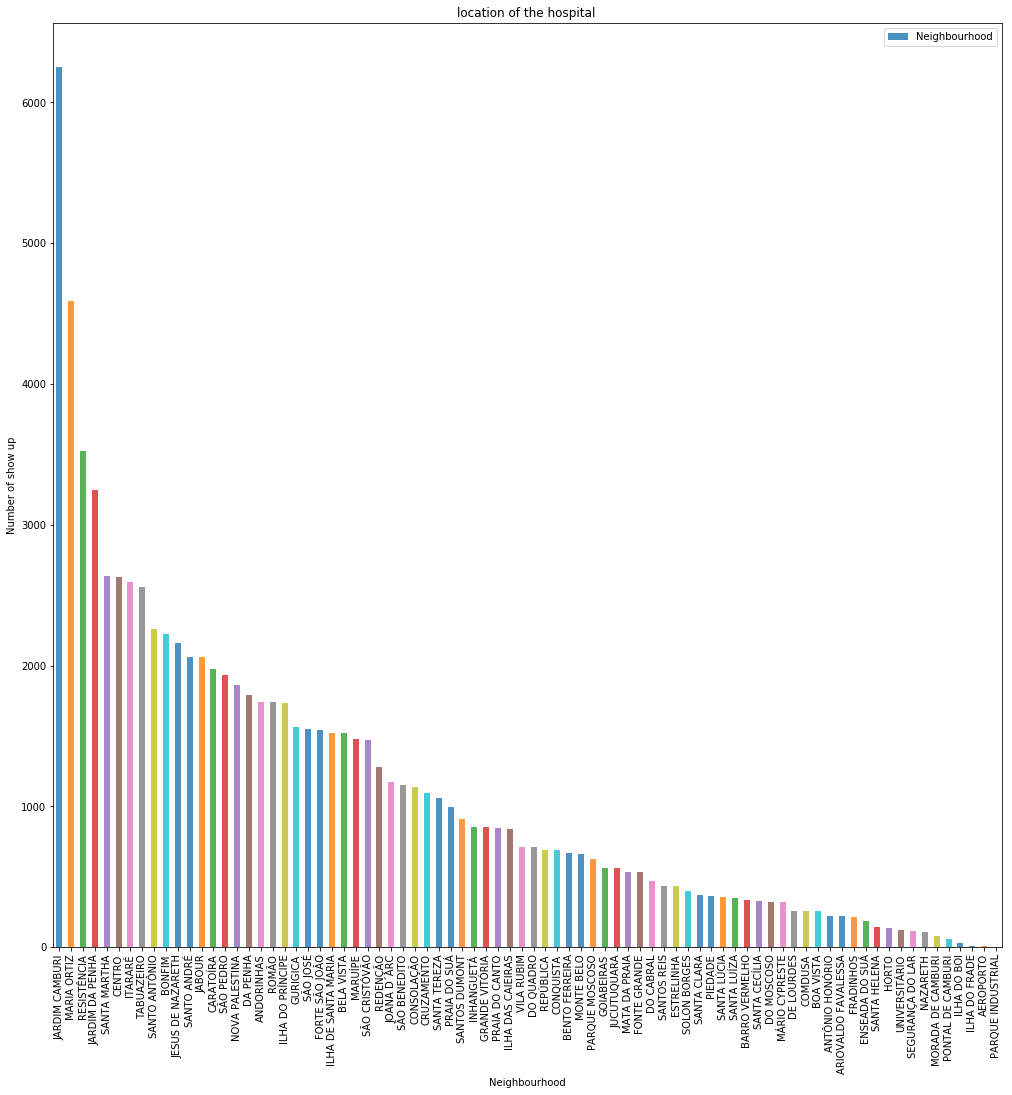

In [171]:
# the names of hospitals that have the highest number for patients who attended the appointmen
df_appoint.Neighbourhood[showup].value_counts().plot(kind='bar', alpha=0.8, figsize=(17,17))
plt.title("location of the hospital ")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of show up")
plt.legend();

> #### The top 5 the names of hospitals that have the highest number for patients who attended the appointment
JARDIM CAMBURI (6200 patients)
MARIA ORTIZ(4700 patients)
RESISTENCIA(3500 patients)
JARDIM DA PENHA(3200 patients)
SANTA MARTHA(2700 patients)

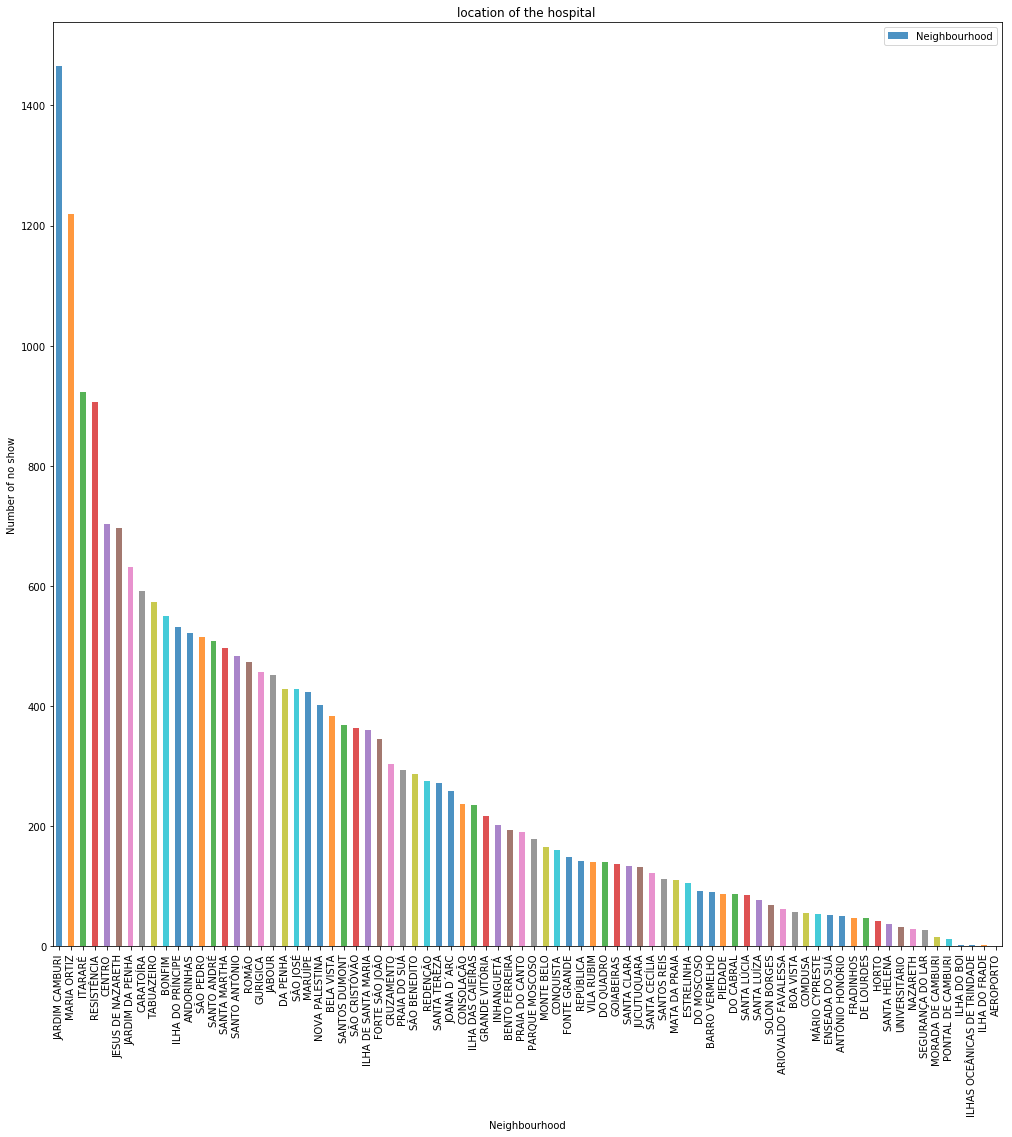

In [172]:
#The names of hospitals that have the highest number for patients who didn't attend the appointment
df_appoint.Neighbourhood[noshow].value_counts().plot(kind='bar', alpha=0.8, figsize=(17,17))
plt.title("location of the hospital ")
plt.xlabel("Neighbourhood")
plt.ylabel("Number of no show")
plt.legend();

> #### The top 5 the names of hospitals that have the highest number for patients who didn't attend the appointment
JARDIM CAMBURI(1475 patients)
MARIA ORTIZ(1220 patients)
ITARARE(930 patients)
RESISTENCIA(700 patients )
CENTRO(690 patients)

<a id='conclusions'></a>
## Conclusions


#### Research Question 1 (what is the distribution of the Age for the patient show-up and no-show the appointment?)
>So, based on this plot, it does look like the really young children have a higher attend appointments then the Age from (45-65).

>the Age form (23 to 40) and (0-5) have a higher number didn't attend appointments.

#### Research Question 2  (How many patients attended and did not attended the appointment with the Gender?)
> The number of female who attended the appointment greater than male.
> The number of female who didn't attend the appointment greater than male. 
> female takes way more care of they healthe in comparison to male.

#### Research Question 3 (compare between the patient who show and didn't show the appointment and whether or not the patient is enrolled in Brasilian welfare program ? )
> The most of the patient unenrolled in Brasilian welfare program are  attended the appointment.

#### Research Question 4 (How many patients attended and did not attended the appointment by received SMS?)
> SMS text message reminders are may not be effective in reducing the nonattendance rate.

#### Research Question 5 (What are hospitals that have the highest number for patients who attended and didn't attend the appointment ?)
> The top 5 the names of hospitals that have the highest number for patients who attended the appointment

JARDIM CAMBURI (6200 patients)
MARIA ORTIZ(4700 patients)
RESISTENCIA(3500 patients)
JARDIM DA PENHA(3200 patients)
SANTA MARTHA(2700 patients)

> The top 5 the names of hospitals that have the highest number for patients who didn't attend the appointment

JARDIM CAMBURI(1475 patients)
MARIA ORTIZ(1220 patients)
ITARARE(930 patients)
RESISTENCIA(700 patients )
CENTRO(690 patients)
 


Finally we can said the most factors are important for us to know in order to predict if a patient will show up for their scheduled appointment is the patient unenrolled in Brasilian welfare program,gender is female, the Age from (45-65) and young children and the location of the hospital.



### limitations  

1.Dealing with mines vlaue in columns.
2.Convert data in column from yes &No to 1,0. 
3.Convert datatype from object to numrical.
4.Create the mask and how can i deal with it .
5.Ddataset is need more details about it .